## Import Modules

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.data as data
from skimage.morphology import extrema 
from skimage.morphology import watershed as skwater
import skimage.segmentation as seg
%matplotlib inline

## Preliminaries

In [22]:
def ShowImage(title,img,ctype):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

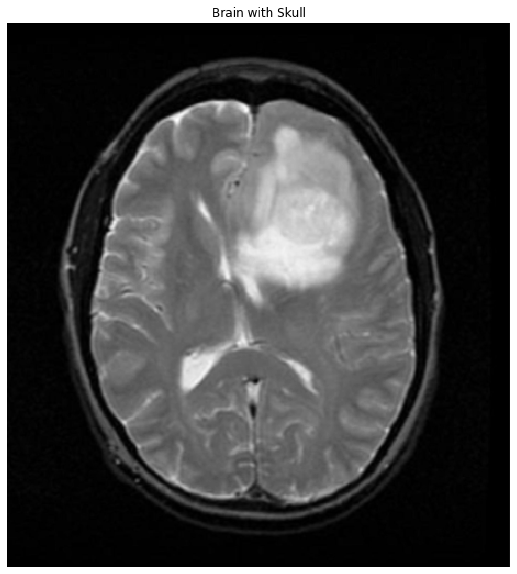

In [25]:
#Read in image
img           = cv2.imread('C:\\Users\\DELL\\Desktop\\data\\brain.png')
gray          = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Brain with Skull',gray,'gray')

## Extracting a mask

If the pixels in the image can be classified into two different intensity classes, that is, if they have a bimodal histogram, then Otsu's method can be used to threshold them into a binary mask. Let's check that assumption.

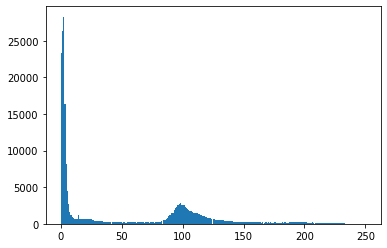

In [26]:
## Make a histogram of the intensities in the grayscale image
plt.hist(gray.ravel(),256)
plt.show()

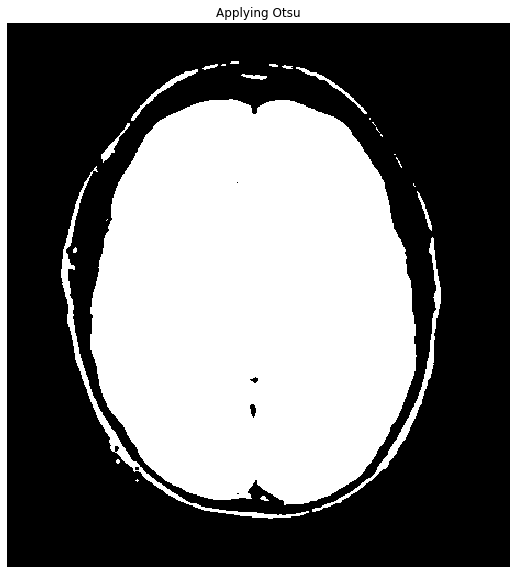

In [30]:
## Threshold the image to binary using Otsu's method

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
ShowImage('Applying Otsu',thresh,'gray')

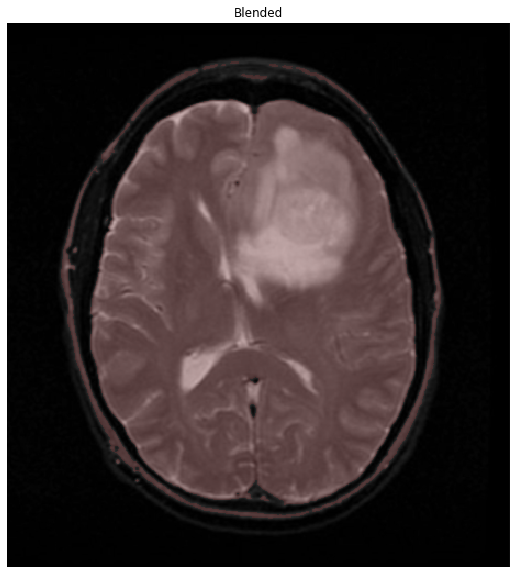

In [31]:
## Things are easier to see if we overlay our mask onto the original image

colormask = np.zeros(img.shape, dtype=np.uint8)
colormask[thresh!=0] = np.array((0,0,255))
blended = cv2.addWeighted(img,0.7,colormask,0.1,0)
ShowImage('Blended', blended, 'bgr')

## Extracting the brain

The overlap of the brain (shown in red) with the mask is so perfect, that we'll stop right here. To do so, let's extract the connected components and find the largest one, which will be the brain.

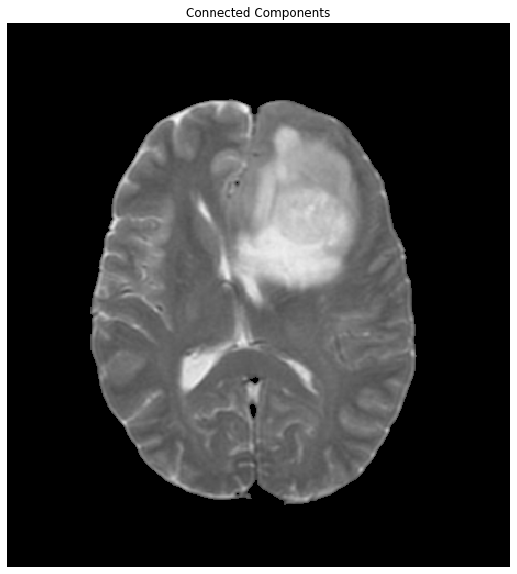

In [33]:
ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 

#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above     

#Get pixels which correspond to the brain
brain_mask = markers==largest_component

brain_out = img.copy()

#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)

ShowImage('Connected Components',brain_out,'rgb')